In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import elo
from copy import deepcopy
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import ratings_scraper

In [2]:
SAMPLE_NUM = 10000

Hacky - adding numbers < 1 to teams with big goal difference advantage

In [53]:
standings = {
    'Man City':92.5,
    'Liverpool':91,
    'Tottenham':70.7,
    'Arsenal': 66,
    'Chelsea': 67,
    'Man United':67,
    'Leicester':51,
    'Wolves':54,
    'Everton':50,
    'Watford':50,
    'West Ham':46,
    'Bournemouth':42,
    'Crystal Palace':43,
    'Burnley':40,
    'Newcastle':42,
    'Southampton':38,
    'Brighton':35.5,
    'Cardiff':31,
    'Fulham':26,
    'Huddersfield':14,   
}

Only run if you want to update ratings - needs internet connection!

In [54]:
ratings_scraper.update_ratings()

Done!


In [55]:
ratings_df = pd.read_csv('data/ratings_latest.csv')

In [56]:
prem_clubs = ['Man City',
 'Liverpool',
 'Tottenham',
 'Arsenal',
 'Chelsea',
 'Man United',
 'Leicester',
 'Wolves',
 'Everton',
 'Watford',
 'West Ham',
 'Bournemouth',
 'Crystal Palace',
 'Burnley',
 'Newcastle',
 'Southampton',
 'Brighton',
 'Cardiff',
 'Fulham',
 'Huddersfield']

In [57]:
ratings = ratings_scraper.filter_ratings(ratings_df, prem_clubs)

In [58]:
ratings

{'Man City': 2020,
 'Liverpool': 2009,
 'Tottenham': 1913,
 'Arsenal': 1871,
 'Man United': 1858,
 'Chelsea': 1858,
 'Everton': 1746,
 'Crystal Palace': 1720,
 'Leicester': 1710,
 'Watford': 1706,
 'Wolves': 1697,
 'Newcastle': 1694,
 'Burnley': 1688,
 'Southampton': 1682,
 'West Ham': 1678,
 'Bournemouth': 1674,
 'Brighton': 1601,
 'Cardiff': 1588,
 'Fulham': 1587,
 'Huddersfield': 1500}

In [59]:
fixtures = [
    ['Everton','Burnley'],
    ['Man City','Leicester'],
    ['West Ham','Southampton'],
    ['Wolves','Fulham'],
    ['Chelsea','Watford'],
    ['Arsenal','Brighton'],
    ['Cardiff','Crystal Palace'],
    ['Huddersfield','Man United'],
    ['Newcastle','Liverpool'],
    ['Bournemouth','Tottenham'],
    ['Tottenham','Everton'],
    ['Man United','Cardiff'],
    ['Watford','West Ham'],
    ['Southampton','Huddersfield'],
    ['Leicester','Chelsea'],
    ['Fulham','Newcastle'],
    ['Liverpool','Wolves'],
    ['Crystal Palace','Bournemouth'],
    ['Brighton','Man City'],
    ['Burnley','Arsenal'],
]

In [60]:
l = elo.League(ratings=deepcopy(ratings),
          standings=deepcopy(standings),
          fixtures=deepcopy(fixtures),
              k_factor=15,
              draw_rate=0.4,
              home_advantage=0.3)

In [61]:
l.get_outcome_probs('Wolves','Arsenal')

(0.3275614282311081,
 (0.2456710711733311, 0.16378071411555406, 0.5905482147111148))

In [62]:
points_totals, rankings = elo.sim_multiple_leagues(ratings, standings, fixtures, SAMPLE_NUM,
                                                  k_factor = 15, draw_rate = 0.4, home_advantage=0.5)

9000/10000


In [63]:
def show_fixtures(team, fixtures):
    for f in [f for f in fixtures if f[0] == team or f[1] == team]:
        print(f)
        print(l.get_outcome_probs(*f))


In [64]:
for team in ['Cardiff','Brighton']:
    show_fixtures(team,fixtures)
    print()

['Cardiff', 'Crystal Palace']
(0.38381488246117385, (0.2878611618458804, 0.19190744123058692, 0.5202313969235327))
['Man United', 'Cardiff']
(0.8687358368269398, (0.8359197960336747, 0.06563208158653011, 0.09844812237979517))

['Arsenal', 'Brighton']
(0.8687358368269399, (0.8359197960336748, 0.06563208158653006, 0.09844812237979511))
['Brighton', 'Man City']
(0.10491471767755765, (0.07868603825816824, 0.05245735883877883, 0.868856602903053))



In [65]:
for team in ['Arsenal','Chelsea','Man United','Tottenham']:
    show_fixtures(team,fixtures)
    print()

['Arsenal', 'Brighton']
(0.8687358368269399, (0.8359197960336748, 0.06563208158653006, 0.09844812237979511))
['Burnley', 'Arsenal']
(0.31607943322669, (0.2370595749200175, 0.158039716613345, 0.6049007084666375))

['Chelsea', 'Watford']
(0.7680775693105263, (0.7100969616381578, 0.11596121534473686, 0.1739418230171053))
['Leicester', 'Chelsea']
(0.36190502696426663, (0.2714287702232, 0.18095251348213331, 0.5476187162946666))

['Huddersfield', 'Man United']
(0.1430252769504623, (0.10726895771284672, 0.07151263847523115, 0.8212184038119221))
['Man United', 'Cardiff']
(0.8687358368269398, (0.8359197960336747, 0.06563208158653011, 0.09844812237979517))

['Bournemouth', 'Tottenham']
(0.24998774987094746, (0.18749081240321058, 0.12499387493547373, 0.6875153126613156))
['Tottenham', 'Everton']
(0.7834172273753988, (0.7292715342192484, 0.10829138631230062, 0.16243707946845098))



In [66]:
for team in ['Liverpool','Man City']:
    show_fixtures(team,fixtures)
    print()

['Newcastle', 'Liverpool']
(0.17641362284497866, (0.132310217133734, 0.08820681142248933, 0.7794829714437767))
['Liverpool', 'Wolves']
(0.8942864037221696, (0.867858004652712, 0.052856798138915195, 0.07928519720837279))

['Man City', 'Leicester']
(0.8931774010008975, (0.8664717512511219, 0.05341129949955126, 0.08011694924932689))
['Brighton', 'Man City']
(0.10491471767755765, (0.07868603825816824, 0.05245735883877883, 0.868856602903053))



In [67]:
rankings_df = pd.melt(pd.DataFrame(rankings)).rename(columns={'variable':'club',
                           'value':'position'})

In [68]:
title_race = rankings_df.loc[rankings_df.position == 1,'club'].value_counts() / SAMPLE_NUM

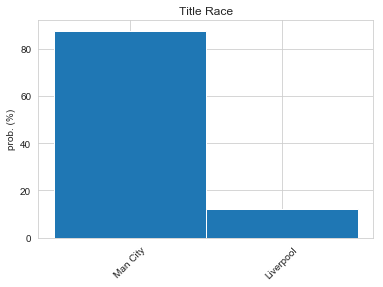

In [69]:
elo.plot_series(title_race.index,title_race * 100,'Title Race')

In [70]:
top_4 = (rankings_df.loc[
    (rankings_df.position < 5) & 
    (rankings_df.position > 2),'club'].value_counts() / SAMPLE_NUM)


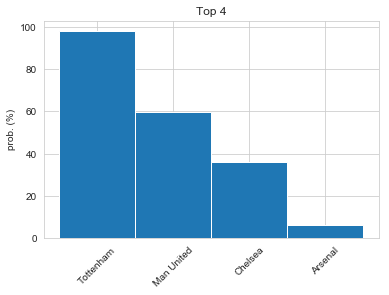

In [71]:
elo.plot_series(top_4.index,top_4 * 100,'Top 4')

In [72]:
top_4

Tottenham     0.9801
Man United    0.5946
Chelsea       0.3620
Arsenal       0.0633
Name: club, dtype: float64

In [73]:
religated = rankings_df.loc[rankings_df.position > 17,'club'].value_counts() / SAMPLE_NUM

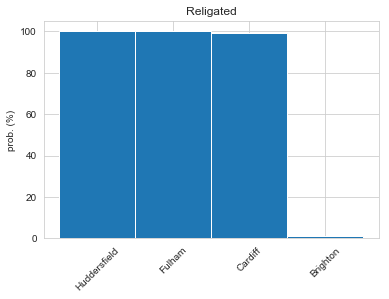

In [74]:
elo.plot_series(religated.index,religated * 100,'Religated')

In [75]:
points_df = pd.melt(pd.DataFrame(points_totals)).rename(columns={'variable':'club',
                           'value':'points'})

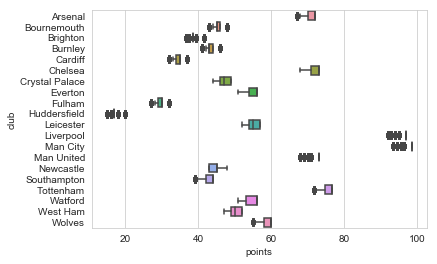

In [76]:
sns.boxplot(data=points_df,y='club',x='points')

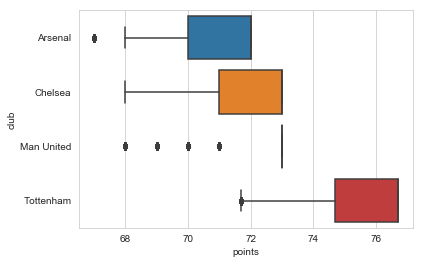

In [77]:
sns.boxplot(data=points_df.loc[points_df.club.isin(['Arsenal','Chelsea','Tottenham','Man United']),:]
                               ,y='club',x='points')